# Data Wrangling

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import nltk
import warnings

%matplotlib inline
pd.set_option("display.max_columns", None)
warnings.filterwarnings('ignore')

### Load and Preview Data

In the Jupyter notebook on exploratory data analysis, we used the entire data downloaded from the CFPB which comprised of complaints up to 5/14/19.  That allowed for a more accurate analysis of the data.  The data was loaded from a file called 'complaint_full_data.csv', and contained 1,284,185 rows of data.

Here, we are getting the data ready for machine learning.  Since we want to predict which complaints would likely be responded to in an untimtely manner, we want rows of data that give as much information about the complaint as possible.  For machine learning, we are only including rows of data that have a customer response where they detail their complaints.  This way we can apply NLP to machine learning.  The data from 'complaints.csv' has already been filtered from a SQL query to only have rows with customer complaint narrative.  The filtered data set contains 383,840 entries prior to cleaning it up.

In [4]:
df = pd.read_csv('C:\\Users\\jltsa\\Desktop\\Cust_complaints\\Data\\complaints.csv')

In [5]:
df.head(10)

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id
0,2016-02-15,Credit card,NaN,Billing statement,NaN,Year end summary provided by citi shows balanc...,Company chooses not to provide a public response,"CITIBANK, N.A.",NY,10005,NaN,Consent provided,Web,2016-02-15,Closed with explanation,True,Yes,1787258
1,2016-02-15,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,I received a letter from a debt collector clai...,Company believes it acted appropriately as aut...,"Amsher Collection Services, Inc.",KS,675XX,NaN,Consent provided,Web,2016-02-15,Closed with explanation,True,Yes,1788025
2,2016-02-15,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,I HAVE SUBMITTED COMPLAINTS TO XXXX OF UPSTATE...,Company believes it acted appropriately as aut...,"Credit Protection Association, L.P.",NY,NaN,NaN,Consent provided,Web,2016-02-15,Closed with non-monetary relief,True,No,1787606
3,2016-02-15,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt resulted from identity theft,XXXX has XXXX accounts in my name that were fr...,NaN,"Convergent Resources, Inc.",DE,197XX,NaN,Consent provided,Web,2016-02-15,Closed with explanation,True,No,1787903
4,2016-02-15,Credit card,NaN,Late fee,NaN,"When making online, through personal bank, pay...",NaN,SYNCHRONY FINANCIAL,FL,33862,Older American,Consent provided,Web,2016-02-18,Closed with monetary relief,True,No,1788019
5,2016-02-15,Bank account or service,Other bank product/service,"Account opening, closing, or management",NaN,I am a Bank of America ( bank ) customer. I re...,Company chooses not to provide a public response,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,957XX,NaN,Consent provided,Web,2016-02-15,Closed with explanation,True,Yes,1787607
6,2016-02-15,Debt collection,I do not know,Taking/threatening an illegal action,Sued where didn't live/sign for debt,I got a call from my HR at work to tell me my ...,NaN,ENCORE CAPITAL GROUP INC.,NJ,070XX,NaN,Consent provided,Web,2016-02-17,Closed with explanation,True,No,1787790
7,2016-02-15,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,Mortgage was approved for 2MP program in conju...,Company disputes the facts presented in the co...,"West Coast Servicing, Inc.",MI,481XX,NaN,Consent provided,Web,2016-03-23,Closed with explanation,True,No,1787834
8,2016-02-15,Credit reporting,NaN,Incorrect information on credit report,Account terms,To whom it may concern : I had a XXXX XXXX aut...,Company chooses not to provide a public response,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,750XX,NaN,Consent provided,Web,2016-02-15,Closed with non-monetary relief,True,No,1787738
9,2016-02-15,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,on XX/XX/XXXX we paid our regular mtg when we ...,Company chooses not to provide a public response,U.S. BANCORP,OH,456XX,NaN,Consent provided,Web,2016-02-15,Closed with explanation,True,No,1787498


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383840 entries, 0 to 383839
Data columns (total 18 columns):
date_received                   383840 non-null object
product                         383840 non-null object
sub_product                     331667 non-null object
issue                           383840 non-null object
sub_issue                       270131 non-null object
consumer_complaint_narrative    383840 non-null object
company_public_response         182806 non-null object
company                         383840 non-null object
state                           382454 non-null object
zip_code                        295000 non-null object
tags                            66299 non-null object
consumer_consent_provided       383840 non-null object
submitted_via                   383840 non-null object
date_sent_to_company            383840 non-null object
company_response_to_consumer    383836 non-null object
timely_response                 383840 non-null bool
consumer_dis

## Missing / NaN values in the Data

In [7]:
df.isnull().sum()

date_received                        0
product                              0
sub_product                      52173
issue                                0
sub_issue                       113709
consumer_complaint_narrative         0
company_public_response         201034
company                              0
state                             1386
zip_code                         88840
tags                            317541
consumer_consent_provided            0
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         4
timely_response                      0
consumer_disputed               219764
complaint_id                         0
dtype: int64

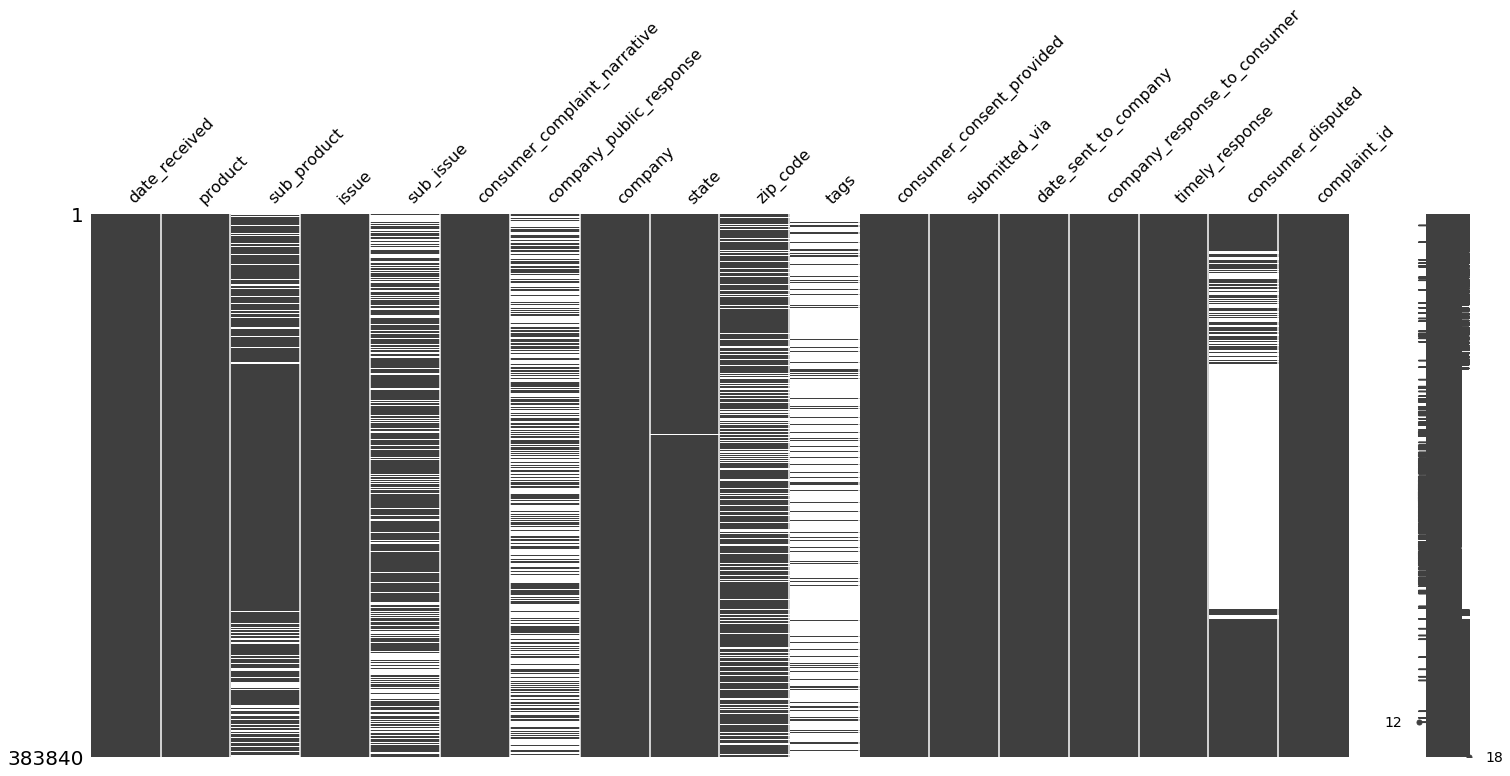

In [14]:
msno.matrix(df)

White areas represent where there are NaN or missing values from the dataset.

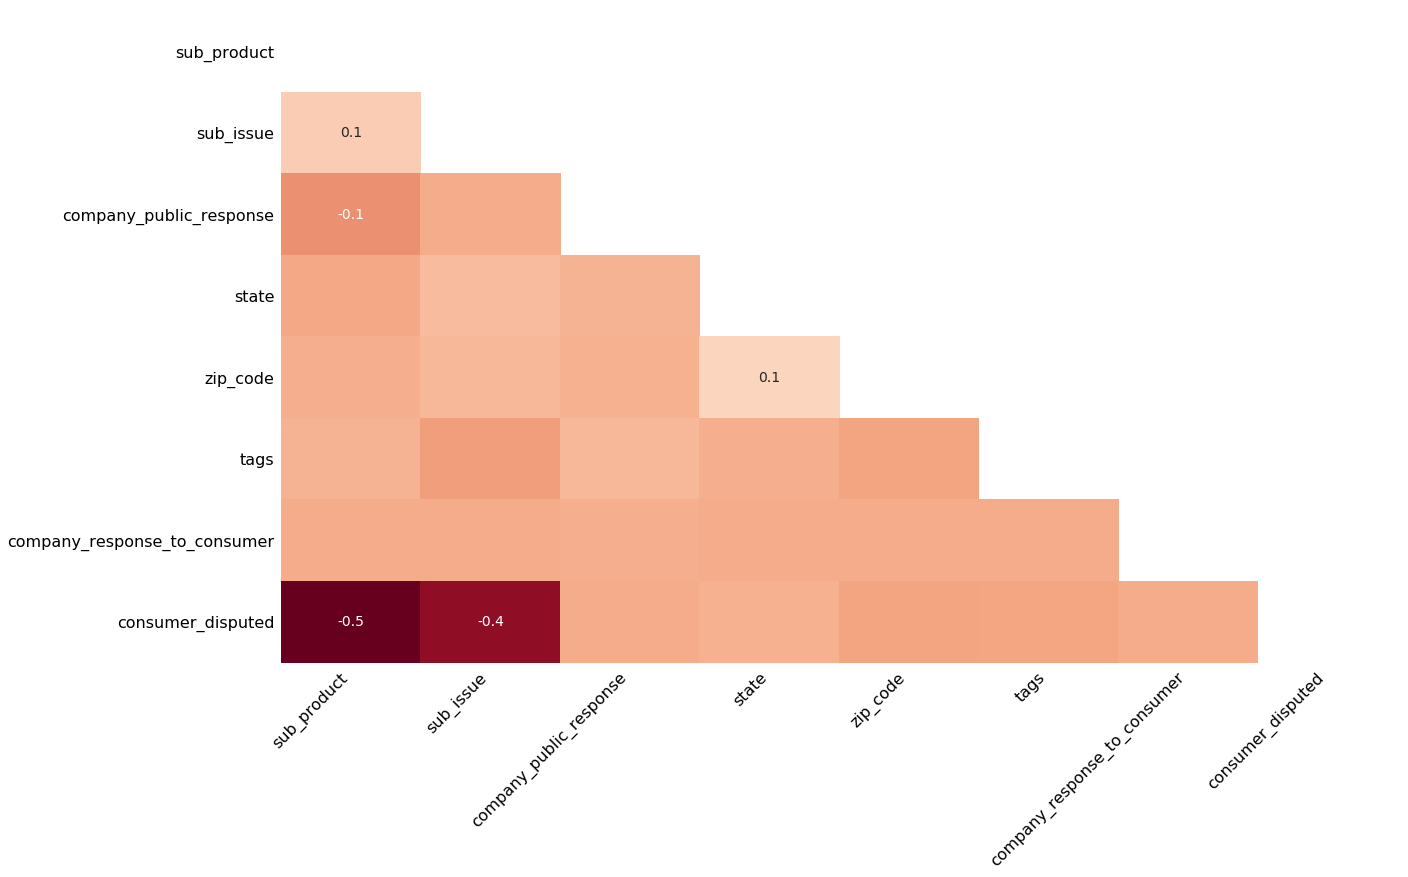

In [12]:
msno.heatmap(df)

The correlation heatmap above measures nullity correlation or how strongly the presence or absence of a feature affects the presence of another.

If there are no values in the cells, it means there is no meaningful correlation.

The biggest correlation to notice, is that when sub_product and sub_issue are present independentaly of each other, then consumer_disputed feature is likely to not be present.

### What to do with missing values?

For the columns comsumer_diputed, tags, zip_code, state, and company_response, since there are so many missing values, it may be best to remove these columns completely rather than filling them with some default values.  We can experiment with running training models to see what the results are like and decide if including these columns back in later would yield better results.

Sub issue and Sub products are important features and should be kept.  It makes sense to not remove or fill in these values, but rather put a default value.

Keeping this in mind, it makes more sense to have different feature set to test which produces the best results.

## Preprocessing Customer Complaint Narrative

This column contains the customer description about the complaint they filed.  This is an important feature and will have to be cleaned up.  Upon inspecting the .csv file, the customer's sensitive information like phone numbers and date of birth have been replaced by 'X's.  Amounts of money are surrounded by { } with  a $ sign in front of the dollar value.

In [18]:
#Can open the NLTK Downloader App which has some useful downloads for NLP tasks
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [24]:
df['consumer_complaint_narrative'].head(10)

0    Year end summary provided by citi shows balanc...
1    I received a letter from a debt collector clai...
2    I HAVE SUBMITTED COMPLAINTS TO XXXX OF UPSTATE...
3    XXXX has XXXX accounts in my name that were fr...
4    When making online, through personal bank, pay...
5    I am a Bank of America ( bank ) customer. I re...
6    I got a call from my HR at work to tell me my ...
7    Mortgage was approved for 2MP program in conju...
8    To whom it may concern : I had a XXXX XXXX aut...
9    on XX/XX/XXXX we paid our regular mtg when we ...
Name: consumer_complaint_narrative, dtype: object

### Remove Punctuation

In [19]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
#Define function to remove punctuation
def rm_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

In [27]:
df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].apply(lambda x: rm_punct(x))

In [29]:
df['consumer_complaint_narrative'].head(10)

0    Year end summary provided by citi shows balanc...
1    I received a letter from a debt collector clai...
2    I HAVE SUBMITTED COMPLAINTS TO XXXX OF UPSTATE...
3    XXXX has XXXX accounts in my name that were fr...
4    When making online through personal bank payme...
5    I am a Bank of America  bank  customer I recei...
6    I got a call from my HR at work to tell me my ...
7    Mortgage was approved for 2MP program in conju...
8    To whom it may concern  I had a XXXX XXXX auto...
9    on XXXXXXXX we paid our regular mtg when we di...
Name: consumer_complaint_narrative, dtype: object

### Remove 'X's

In [30]:
import re

In [195]:
def rm_x(row):
    return re.sub('X*', '', row['consumer_complaint_narrative'])

In [57]:
df['consumer_complaint_narrative'] = df.apply(rm_x, axis=1)

In [59]:
df['consumer_complaint_narrative'].head(10)

0    Year end summary provided by citi shows balanc...
1    I received a letter from a debt collector clai...
2    I HAVE SUBMITTED COMPLAINTS TO  OF UPSTATE NY ...
3     has  accounts in my name that were fraudulent...
4    When making online through personal bank payme...
5    I am a Bank of America  bank  customer I recei...
6    I got a call from my HR at work to tell me my ...
7    Mortgage was approved for 2MP program in conju...
8    To whom it may concern  I had a   auto loan th...
9    on  we paid our regular mtg when we did eviden...
Name: consumer_complaint_narrative, dtype: object

### Remove Extra White Spaces

In [204]:
def rm_white(row):
    return re.sub(' +', ' ', row['consumer_complaint_narrative']).strip()

In [205]:
df['consumer_complaint_narrative'] = df.apply(rm_white, axis=1)

In [206]:
df['consumer_complaint_narrative'].head()

0    Year end summary provided by citi shows balanc...
1    I received a letter from a debt collector clai...
2    I HAVE SUBMITTED COMPLAINTS TO OF UPSTATE NY C...
3    has accounts in my name that were fraudulently...
4    When making online through personal bank payme...
Name: consumer_complaint_narrative, dtype: object

### Take care of Word Lengthening

For instance "Hellllo" shoudld be "Hello"

In [209]:
def correct_words(row):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", row['consumer_complaint_narrative'])

In [210]:
df['consumer_complaint_narrative'] = df.apply(correct_words, axis=1)

In [211]:
df['consumer_complaint_narrative'].head()

0    Year end summary provided by citi shows balanc...
1    I received a letter from a debt collector clai...
2    I HAVE SUBMITTED COMPLAINTS TO OF UPSTATE NY C...
3    has accounts in my name that were fraudulently...
4    When making online through personal bank payme...
Name: consumer_complaint_narrative, dtype: object

In [212]:
#save the cleaned up text version of DataFrame
#df.to_csv('complaints_clean_text.csv', index=False)

For the remaining pre-processing, it may be easier to use scikitlearn.  However, see below for examples of the other preprocessing steps.

### Tokenize Text

In [88]:
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

In [89]:
#make words lowercase as well
df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].apply(lambda x: tokenize(x.lower()))

In [91]:
df['consumer_complaint_narrative'].head()

0    [year, end, summary, provided, by, citi, shows...
1    [i, received, a, letter, from, a, debt, collec...
2    [i, have, submitted, complaints, to, of, upsta...
3    [, has, accounts, in, my, name, that, were, fr...
4    [when, making, online, through, personal, bank...
Name: consumer_complaint_narrative, dtype: object

In [100]:
#remove any white spaces from teh tokenized text
def remove_blanks(row):
    return list(filter(lambda x: x !='', row['consumer_complaint_narrative']))

In [102]:
df['consumer_complaint_narrative'] = df.apply(remove_blanks, axis=1)

In [103]:
df['consumer_complaint_narrative'].head(10)

0    [year, end, summary, provided, by, citi, shows...
1    [i, received, a, letter, from, a, debt, collec...
2    [i, have, submitted, complaints, to, of, upsta...
3    [has, accounts, in, my, name, that, were, frau...
4    [when, making, online, through, personal, bank...
5    [i, am, a, bank, of, america, bank, customer, ...
6    [i, got, a, call, from, my, hr, at, work, to, ...
7    [mortgage, was, approved, for, 2mp, program, i...
8    [to, whom, it, may, concern, i, had, a, auto, ...
9    [on, we, paid, our, regular, mtg, when, we, di...
Name: consumer_complaint_narrative, dtype: object

### Remove stop words
Words common words that do not give much meaning to a sentence like 'is' or 'of'

In [107]:
stopword = nltk.corpus.stopwords.words('english')

In [109]:
def rm_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

In [110]:
df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].apply(lambda x: rm_stopwords(x))

In [111]:
#df.to_csv('complaints_tokenized_text2.csv', index=False)

In [114]:
df['consumer_complaint_narrative'].head()

0    [year, end, summary, provided, citi, shows, ba...
1    [received, letter, debt, collector, claiming, ...
2    [submitted, complaints, upstate, ny, concernin...
3    [accounts, name, fraudulently, created, workin...
4    [making, online, personal, bank, payments, mot...
Name: consumer_complaint_narrative, dtype: object

### Stemming Versus Lemmatizing the Words
Stemming - Removing suffixes like '-ing' and '-ly'

Lemmatizing - 'Running, Runs, Ran' becomes 'Run'

Create two separate data sets from the tokenized words with stop words removed. They may have different results

In [116]:
ps = nltk.PorterStemmer()

In [117]:
def stem(tokenized_list):
    text = [ps.stem(word) for word in tokenized_list]
    return text

In [118]:
df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].apply(lambda x: stem(x))

In [119]:
#df.to_csv('tokenized_text_stemmed.csv', index=False)

In [121]:
df['consumer_complaint_narrative'].head()

0    [year, end, summari, provid, citi, show, balan...
1    [receiv, letter, debt, collector, claim, owe, ...
2    [submit, complaint, upstat, ny, concern, bad, ...
3    [account, name, fraudul, creat, work, fraud, d...
4    [make, onlin, person, bank, payment, mother, w...
Name: consumer_complaint_narrative, dtype: object

In [120]:
wn = nltk.WordNetLemmatizer()

In [213]:
def lemma(tokenized_list):
    #pos = 'v' lemmatizes verbs
    #pos = 'n' lemmatizes nouns
    text = [wn.lemmatize(word,pos='v') for word in tokenized_list]
    return text

## Choosing Different Features

In [ ]:
df = pd.read_csv('C:\\Users\\jltsa\\Desktop\\Springboard\\Cust_complaints\\Data\\complaints_clean_text.csv')

In [216]:
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id
0,2016-02-15,Credit card,NaN,Billing statement,NaN,Year end summary provided by citi shows balanc...,Company chooses not to provide a public response,"CITIBANK, N.A.",NY,10005,NaN,Consent provided,Web,2016-02-15,Closed with explanation,True,Yes,1787258
1,2016-02-15,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,I received a letter from a debt collector clai...,Company believes it acted appropriately as aut...,"Amsher Collection Services, Inc.",KS,675XX,NaN,Consent provided,Web,2016-02-15,Closed with explanation,True,Yes,1788025
2,2016-02-15,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,I HAVE SUBMITTED COMPLAINTS TO OF UPSTATE NY C...,Company believes it acted appropriately as aut...,"Credit Protection Association, L.P.",NY,NaN,NaN,Consent provided,Web,2016-02-15,Closed with non-monetary relief,True,No,1787606
3,2016-02-15,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt resulted from identity theft,has accounts in my name that were fraudulently...,NaN,"Convergent Resources, Inc.",DE,197XX,NaN,Consent provided,Web,2016-02-15,Closed with explanation,True,No,1787903
4,2016-02-15,Credit card,NaN,Late fee,NaN,When making online through personal bank payme...,NaN,SYNCHRONY FINANCIAL,FL,33862,Older American,Consent provided,Web,2016-02-18,Closed with monetary relief,True,No,1788019


## Feature Set 1

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383840 entries, 0 to 383839
Data columns (total 18 columns):
date_received                   383840 non-null object
product                         383840 non-null object
sub_product                     331667 non-null object
issue                           383840 non-null object
sub_issue                       270131 non-null object
consumer_complaint_narrative    383839 non-null object
company_public_response         182806 non-null object
company                         383840 non-null object
state                           382454 non-null object
zip_code                        295000 non-null object
tags                            66299 non-null object
consumer_consent_provided       383840 non-null object
submitted_via                   383840 non-null object
date_sent_to_company            383840 non-null object
company_response_to_consumer    383836 non-null object
timely_response                 383840 non-null bool
consumer_dis

### Drop Columns

For this feature set I decided to drop the columns that had a large portion of the data missing, so I did not have to remove rows.  Also, two of the features, 'company_public_response' and 'company_response_to_consumer' would be variables that would come at time after the complaint was filed, and this not be a valid predictor variable.

In [220]:
df.drop(columns=['date_received', 'company_public_response', 'state',
                 'zip_code', 'tags', 'consumer_consent_provided', 'date_sent_to_company',
                 'company_response_to_consumer', 'consumer_disputed', 'complaint_id'],inplace=True)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383840 entries, 0 to 383839
Data columns (total 8 columns):
product                         383840 non-null object
sub_product                     331667 non-null object
issue                           383840 non-null object
sub_issue                       270131 non-null object
consumer_complaint_narrative    383839 non-null object
company                         383840 non-null object
submitted_via                   383840 non-null object
timely_response                 383840 non-null bool
dtypes: bool(1), object(7)
memory usage: 20.9+ MB


Later, we can further preprocess the data before machine learning and encode labels as categorical to make computation more efficient.

In [236]:
df['timely_response'] = df['timely_response'].astype('category')

In [239]:
df['timely_response'].head()

0    True
1    True
2    True
3    True
4    True
Name: timely_response, dtype: category
Categories (2, object): [False, True]

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383840 entries, 0 to 383839
Data columns (total 8 columns):
product                         383840 non-null object
sub_product                     383840 non-null object
issue                           383840 non-null object
sub_issue                       383840 non-null object
consumer_complaint_narrative    383840 non-null object
company                         383840 non-null object
submitted_via                   383840 non-null object
timely_response                 383840 non-null category
dtypes: category(1), object(7)
memory usage: 20.9+ MB


### Fill in Missing Values

Some sub products and sub issues may not have a category in real life.  This makes sense.  So we are going to replace those values with "None" as this accurately represents the data.  We will use one hot encoding on categorical features later.

In [226]:
df.fillna('None', inplace=True)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383840 entries, 0 to 383839
Data columns (total 8 columns):
product                         383840 non-null object
sub_product                     383840 non-null object
issue                           383840 non-null object
sub_issue                       383840 non-null object
consumer_complaint_narrative    383840 non-null object
company                         383840 non-null object
submitted_via                   383840 non-null object
timely_response                 383840 non-null bool
dtypes: bool(1), object(7)
memory usage: 20.9+ MB


In [228]:
#df.to_csv('ml_data1.csv', index=False)